In [1]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
%cd /content/gdrive/MyDrive/SLIIT/Research Project/

/content/gdrive/MyDrive/SLIIT/Research Project


In [7]:
#import relevant libraries
import numpy as np
import pandas as pd

#import the csv file to extract data
df=pd.read_csv('Money printing data.csv')
df=df.dropna() #drop null values
print('Shape of data',df.shape)

# define a function to remove comma and convert to float
def remove_comma_and_convert_to_float(s):
    s = s.replace(',', '')
    f = float(s)
    return f


#apply the function to the entire column 
df['Net Credit granted to the Government (NCG)'] = df['Net Credit granted to the Government (NCG)'].apply(remove_comma_and_convert_to_float)

#drop duplicates
dup_sum=df.duplicated(subset='Month').sum()
print(dup_sum)

Shape of data (325, 2)
0


In [8]:
print(df['Month'].unique())

['Dec-95' 'Jan-96' 'Feb-96' 'Mar-96' 'Apr-96' 'May-96' 'Jun-96' 'Jul-96'
 'Aug-96' 'Sep-96' 'Oct-96' 'Nov-96' 'Dec-96' 'Jan-97' 'Feb-97' 'Mar-97'
 'Apr-97' 'May-97' 'Jun-97' 'Jul-97' 'Aug-97' 'Sep-97' 'Oct-97' 'Nov-97'
 'Dec-97' 'Jan-98' 'Feb-98' 'Mar-98' 'Apr-98' 'May-98' 'Jun-98' 'Jul-98'
 'Aug-98' 'Sep-98' 'Oct-98' 'Nov-98' 'Dec-98' 'Jan-99' 'Feb-99' 'Mar-99'
 'Apr-99' 'May-99' 'Jun-99' 'Jul-99' 'Aug-99' 'Sep-99' 'Oct-99' 'Nov-99'
 'Dec-99' 'Jan-00' 'Feb-00' 'Mar-00' 'Apr-00' 'May-00' 'Jun-00' 'Jul-00'
 'Aug-00' 'Sep-00' 'Oct-00' 'Nov-00' 'Dec-00' '1-Jan' '1-Feb' '1-Mar'
 '1-Apr' '1-May' '1-Jun' '1-Jul' '1-Aug' '1-Sep' '1-Oct' '1-Nov' '1-Dec'
 '2-Jan' '2-Feb' '2-Mar' '2-Apr' '2-May' '2-Jun' '2-Jul' '2-Aug' '2-Sep'
 '2-Oct' '2-Nov' '2-Dec' '3-Jan' '3-Feb' '3-Mar' '3-Apr' '3-May' '3-Jun'
 '3-Jul' '3-Aug' '3-Sep' '3-Oct' '3-Nov' '3-Dec' '4-Jan' '4-Feb' '4-Mar'
 '4-Apr' '4-May' '4-Jun' '4-Jul' '4-Aug' '4-Sep' '4-Oct' '4-Nov' '4-Dec'
 '5-Jan' '5-Feb' '5-Mar' '5-Apr' '5-May' '5-Jun' '5-Ju

Date structure is different in some records, so we have to reformat them & then we have to convert the string datatype to datetime of the 'Month' column.

In [9]:
# Replace the additional parts with an empty string since Month records contain additional simbols & letters.
df['Month'] = df['Month'].str.replace(r'(\s*\(\w+\))', '')

# Trim any leading/trailing whitespace characters
df['Month'] = df['Month'].str.strip()

<ipython-input-9-394d5c8c39f3>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Month'] = df['Month'].str.replace(r'(\s*\(\w+\))', '')


Using this code I am trying to extract the dates that are in a different format (mm-yy) compared to the majority of others. 

In [10]:
import re

date_pattern = r'\b\w{3}-\d{2}\b'
mm_yy_dates = [date for date in df['Month'] if re.match(date_pattern, date)] #Take all the elements that are in the format of mm-yy.

In [11]:
print(mm_yy_dates)

['Dec-95', 'Jan-96', 'Feb-96', 'Mar-96', 'Apr-96', 'May-96', 'Jun-96', 'Jul-96', 'Aug-96', 'Sep-96', 'Oct-96', 'Nov-96', 'Dec-96', 'Jan-97', 'Feb-97', 'Mar-97', 'Apr-97', 'May-97', 'Jun-97', 'Jul-97', 'Aug-97', 'Sep-97', 'Oct-97', 'Nov-97', 'Dec-97', 'Jan-98', 'Feb-98', 'Mar-98', 'Apr-98', 'May-98', 'Jun-98', 'Jul-98', 'Aug-98', 'Sep-98', 'Oct-98', 'Nov-98', 'Dec-98', 'Jan-99', 'Feb-99', 'Mar-99', 'Apr-99', 'May-99', 'Jun-99', 'Jul-99', 'Aug-99', 'Sep-99', 'Oct-99', 'Nov-99', 'Dec-99', 'Jan-00', 'Feb-00', 'Mar-00', 'Apr-00', 'May-00', 'Jun-00', 'Jul-00', 'Aug-00', 'Sep-00', 'Oct-00', 'Nov-00', 'Dec-00', 'Oct-15', 'Mar-22', 'Apr-22', 'May-22', 'Oct-22']


In [12]:
import re
import datetime

# Define the function to convert month-year dates into year-month
def convert_month_date(date_str):
  month = date_str[:3]  # Extract the first two characters as month
  year = date_str[-2:]  # Extract the last two characters as year
  date_str = year + '-' + month  # Reformat the date string as yy-mm
  print(date_str)
  return date_str

# calling the function
converted_dates = [convert_month_date(date) for date in mm_yy_dates]

# Iterate over mm_yy_dates and replace the values in the DataFrame with the values in converted_dates where we have the dates with corrected format. (yy-mm)
for mm_yy_date in mm_yy_dates:
    mm_yy_month, mm_yy_year = mm_yy_date.split('-')  # Split the mm-yy date into month and year
    print("month : " + mm_yy_month + "year : " + mm_yy_year )
    converted_date = next((date for date in converted_dates if date[-3:] == mm_yy_month and date[:2] == mm_yy_year), None)
    print("converted date : " + converted_date)
    if converted_date:
      df.loc[df['Month'] == mm_yy_date, 'Month'] = converted_date


95-Dec
96-Jan
96-Feb
96-Mar
96-Apr
96-May
96-Jun
96-Jul
96-Aug
96-Sep
96-Oct
96-Nov
96-Dec
97-Jan
97-Feb
97-Mar
97-Apr
97-May
97-Jun
97-Jul
97-Aug
97-Sep
97-Oct
97-Nov
97-Dec
98-Jan
98-Feb
98-Mar
98-Apr
98-May
98-Jun
98-Jul
98-Aug
98-Sep
98-Oct
98-Nov
98-Dec
99-Jan
99-Feb
99-Mar
99-Apr
99-May
99-Jun
99-Jul
99-Aug
99-Sep
99-Oct
99-Nov
99-Dec
00-Jan
00-Feb
00-Mar
00-Apr
00-May
00-Jun
00-Jul
00-Aug
00-Sep
00-Oct
00-Nov
00-Dec
15-Oct
22-Mar
22-Apr
22-May
22-Oct
month : Decyear : 95
converted date : 95-Dec
month : Janyear : 96
converted date : 96-Jan
month : Febyear : 96
converted date : 96-Feb
month : Maryear : 96
converted date : 96-Mar
month : Apryear : 96
converted date : 96-Apr
month : Mayyear : 96
converted date : 96-May
month : Junyear : 96
converted date : 96-Jun
month : Julyear : 96
converted date : 96-Jul
month : Augyear : 96
converted date : 96-Aug
month : Sepyear : 96
converted date : 96-Sep
month : Octyear : 96
converted date : 96-Oct
month : Novyear : 96
converted date : 96-No

In [13]:
df['Month'].unique()

array(['95-Dec', '96-Jan', '96-Feb', '96-Mar', '96-Apr', '96-May',
       '96-Jun', '96-Jul', '96-Aug', '96-Sep', '96-Oct', '96-Nov',
       '96-Dec', '97-Jan', '97-Feb', '97-Mar', '97-Apr', '97-May',
       '97-Jun', '97-Jul', '97-Aug', '97-Sep', '97-Oct', '97-Nov',
       '97-Dec', '98-Jan', '98-Feb', '98-Mar', '98-Apr', '98-May',
       '98-Jun', '98-Jul', '98-Aug', '98-Sep', '98-Oct', '98-Nov',
       '98-Dec', '99-Jan', '99-Feb', '99-Mar', '99-Apr', '99-May',
       '99-Jun', '99-Jul', '99-Aug', '99-Sep', '99-Oct', '99-Nov',
       '99-Dec', '00-Jan', '00-Feb', '00-Mar', '00-Apr', '00-May',
       '00-Jun', '00-Jul', '00-Aug', '00-Sep', '00-Oct', '00-Nov',
       '00-Dec', '1-Jan', '1-Feb', '1-Mar', '1-Apr', '1-May', '1-Jun',
       '1-Jul', '1-Aug', '1-Sep', '1-Oct', '1-Nov', '1-Dec', '2-Jan',
       '2-Feb', '2-Mar', '2-Apr', '2-May', '2-Jun', '2-Jul', '2-Aug',
       '2-Sep', '2-Oct', '2-Nov', '2-Dec', '3-Jan', '3-Feb', '3-Mar',
       '3-Apr', '3-May', '3-Jun', '3-Jul', '3-Aug

In [14]:
#Add 0 for years where only one digit exists. 
df['Month'] = df['Month'].str.replace(r'\b(\d{1})\b', r'0\1', regex=True)

In [15]:
from pandas import to_datetime

# prepare expected column names
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'], format='%y-%b')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      325 non-null    datetime64[ns]
 1   y       325 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.6 KB


Data type of Month column is changed to datetime & the dataset is preprocessed. Now lets try to fit the Prophet model & do the predictions.

First, lets check whether there is trend or seasonality even though it doesnt matter when it comes to Prophet.

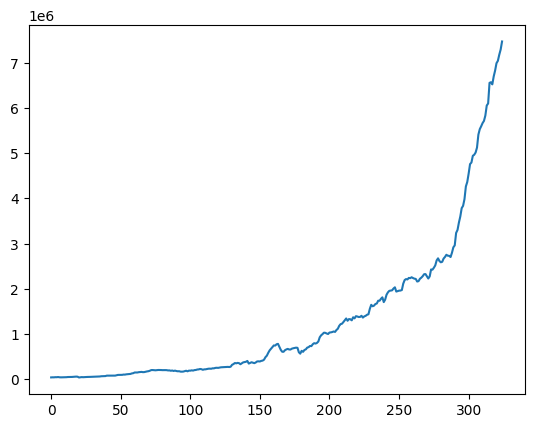

In [17]:
from matplotlib import pyplot as plt

# plot the time series
df['y'].plot()
plt.show()

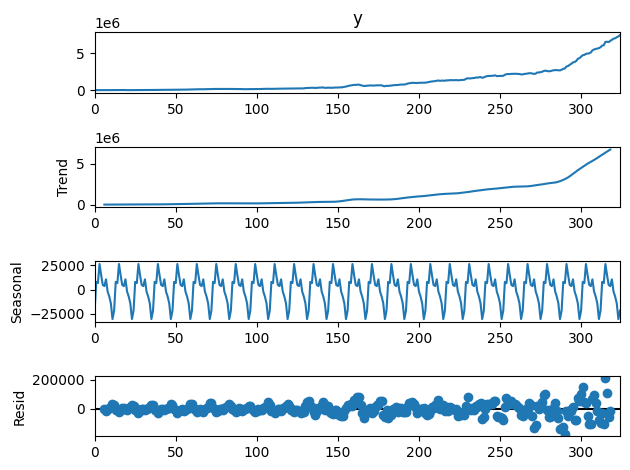

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition using moving averages
decomposition = seasonal_decompose(df['y'], model='additive', period=12)

# Plot the seasonal decomposition
fig = decomposition.plot()

In [ ]:
df.head()

,ds,y
0,1995-12-01,38662.0
1,1996-01-01,40795.0
2,1996-02-01,40238.0
3,1996-03-01,43617.0
4,1996-04-01,43090.0


In [19]:
!pip install prophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
#import the Prophet library
from prophet import Prophet

# define the model
model = Prophet()

# Add a custom periodicity of 12 months (yearly seasonality) as we can see there is yearly seasonality.
model.add_seasonality(name='yearly', period=12, fourier_order=3)

# fit the model
model.fit(df)


INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeuy9n29m/90m2i4_h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeuy9n29m/1l2l7pw4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83146', 'data', 'file=/tmp/tmpeuy9n29m/90m2i4_h.json', 'init=/tmp/tmpeuy9n29m/1l2l7pw4.json', 'output', 'file=/tmp/tmpeuy9n29m/prophet_modelp2p2jpab/prophet_model-20230523152950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:29:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:29:50 - cmdstanpy - INFO - Chain [1] do

Lets make an in-sample forecast using the model which means predict the trained values. There the model already knows the values as it is trained using those values.

          ds          yhat    yhat_lower    yhat_upper
0 2015-01-01  1.448262e+06  1.058972e+06  1.811713e+06
1 2015-02-01  1.420486e+06  1.058636e+06  1.791957e+06
2 2015-03-01  1.469690e+06  1.133510e+06  1.821412e+06
3 2015-04-01  1.461806e+06  1.100981e+06  1.806692e+06
4 2015-05-01  1.495997e+06  1.133129e+06  1.873562e+06


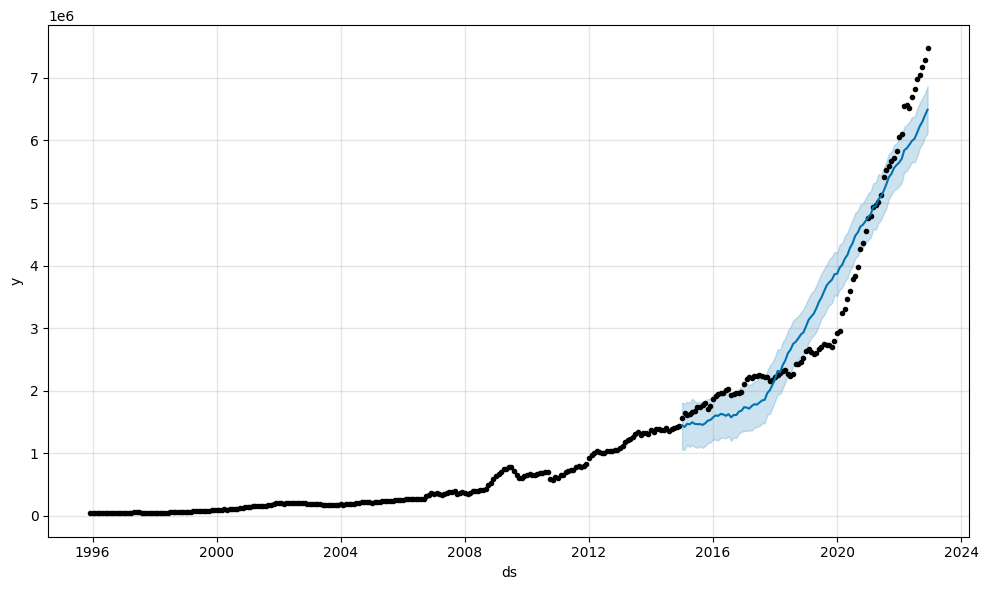

In [21]:
from pandas import DataFrame
from matplotlib import pyplot

# define the period for which we want a prediction. So lets forcast values for the 2015-2022 period.
future = []
for year in range(2015, 2023):  # Iterate over the years 2015 to 2022
    for month in range(1, 13):  # Iterate over the months from 1 to 12
        date = f'{year}-{month:02d}'  # Format the date as 'YYYY-MM'
        future.append([date])


future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

# use the model to make a forecast
forecast = model.predict(future)

# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

# plot forecast
model.plot(forecast)
pyplot.show()

Prediction seems decent, but need to explore more on how to improve the model accuracy.

          ds          yhat    yhat_lower    yhat_upper
0 2023-01-01  6.544921e+06  6.173500e+06  6.915852e+06
1 2023-02-01  6.584734e+06  6.189795e+06  6.939758e+06
2 2023-03-01  6.686192e+06  6.325055e+06  7.064770e+06
3 2023-04-01  6.780139e+06  6.398348e+06  7.127005e+06
4 2023-05-01  6.828869e+06  6.473558e+06  7.150264e+06


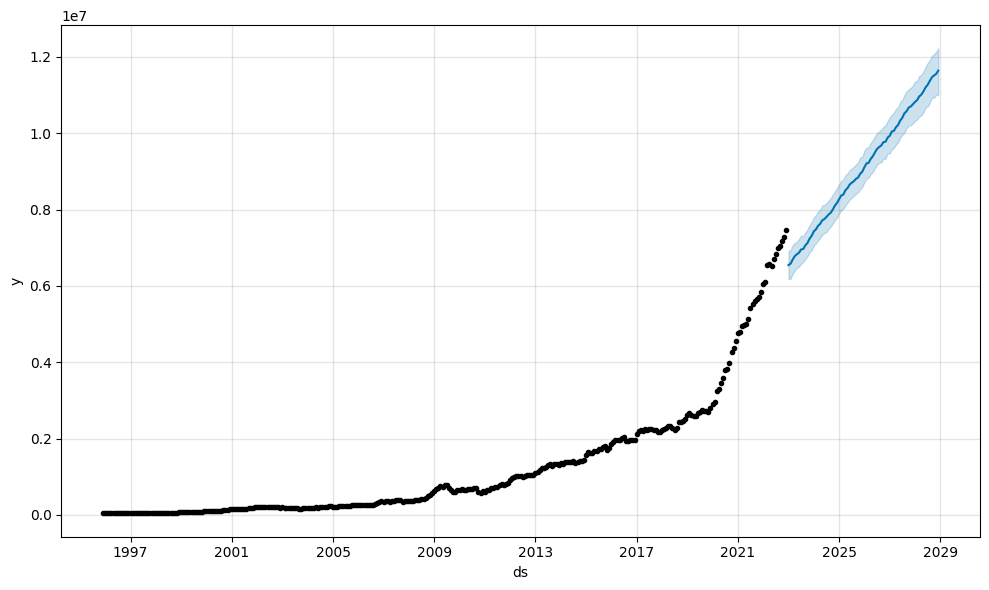

In [22]:
# define the period for which we want a prediction. Lets forcast values for the 2023-2028 period.
future = []
for year in range(2023, 2029):  # Iterate over the years 2015 to 2022
    for month in range(1, 13):  # Iterate over the months from 1 to 12
        date = f'{year}-{month:02d}'  # Format the date as 'YYYY-MM'
        future.append([date])


future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

# use the model to make a forecast
forecast = model.predict(future)

# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

#get the forcast data into a csv file
forecast.to_csv('forecast_next_5years.csv', index=False)

# plot forecast
model.plot(forecast)
pyplot.show()

In [20]:
from sklearn.metrics import mean_squared_error

# align actual values with the forecasted period
actual_values = df[df['ds'].isin(future['ds'])]['y']

# calculate the mean squared error (MSE)
mse = mean_squared_error(actual_values, forecast['yhat'])
print("Mean Squared Error (MSE):", mse)

# calculate MAE between expected and predicted values
#y_true = df['y'].values
#y_pred = forecast['yhat'].values
#mae = mean_absolute_error(y_true, y_pred)
#print('MAE: %.3f' % mae)

Mean Squared Error (MSE): 265272504303.1299


Lets try the same thing by splitting the dataset into training & testing.

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, shuffle=False)

In [ ]:
#import the Prophet library
from prophet import Prophet

# define the model
model = Prophet()

# Add a custom periodicity of 12 months (yearly seasonality) as we can see there is yearly seasonality.
model.add_seasonality(name='yearly', period=12, fourier_order=3)

# fit the model
model.fit(train)

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoc2v4ixz/v22dvf71.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoc2v4ixz/tnfri4ij.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41762', 'data', 'file=/tmp/tmpoc2v4ixz/v22dvf71.json', 'init=/tmp/tmpoc2v4ixz/tnfri4ij.json', 'output', 'file=/tmp/tmpoc2v4ixz/prophet_modelnopzxq8_/prophet_model-20230520084504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:45:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:45:04 - cmdstanpy - INFO - Chain [1] do

          ds          yhat    yhat_lower    yhat_upper
0 2017-08-01  2.217075e+06  2.153812e+06  2.278811e+06
1 2017-09-01  2.229399e+06  2.168030e+06  2.295237e+06
2 2017-10-01  2.260405e+06  2.197424e+06  2.331170e+06
3 2017-11-01  2.267977e+06  2.204840e+06  2.330652e+06
4 2017-12-01  2.305007e+06  2.244199e+06  2.374525e+06


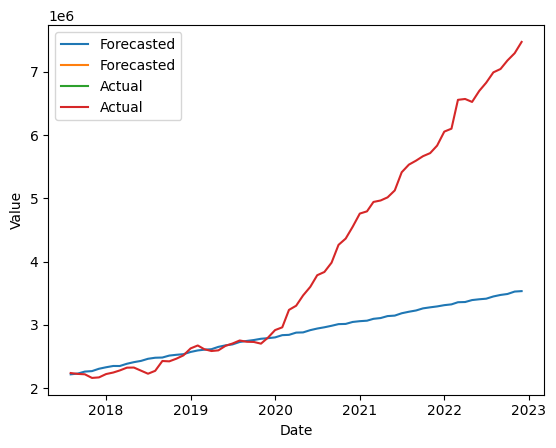

In [ ]:
from matplotlib import pyplot as plt

# use the model to make a forecast
forecast = model.predict(test)

# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

#combine forcast & testing data
combined_df = pd.concat([forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], test[['ds', 'y']]], axis=1)

#plot both actual & forcasted values
plt.plot(combined_df['ds'], combined_df['yhat'], label='Forecasted')
plt.plot(combined_df['ds'], combined_df['y'], label='Actual')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error

# calculate MAE between expected and predicted values
y_true = test['y'].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)